<a href="https://colab.research.google.com/github/penggunaSendal/HearthFailurePrediction/blob/main/hearthfailureprediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [5]:
from io import BytesIO

csv = BytesIO(uploaded['heart.csv'])

In [7]:
from pandas import read_csv

csv = read_csv(csv)
data = pd.DataFrame(data=csv)

data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [11]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

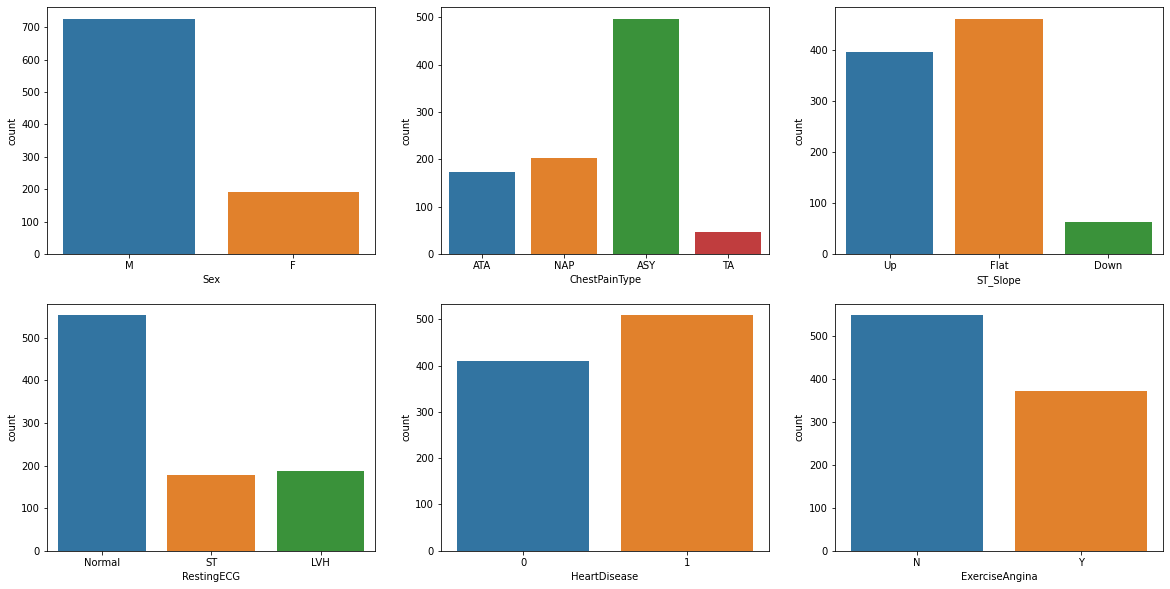

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

sns.countplot(x=data['Sex'], data=data, ax=axs[0, 0])
sns.countplot(x=data['ChestPainType'], data=data, ax=axs[0, 1])
sns.countplot(x=data['RestingECG'], data=data, ax=axs[1, 0])
sns.countplot(x=data['HeartDisease'], data=data, ax=axs[1, 1])
sns.countplot(x=data['ST_Slope'], data=data, ax=axs[0, 2])
sns.countplot(x=data['ExerciseAngina'], data=data, ax=axs[1, 2])

In [ ]:
# Transforming Feature from object to int64bit

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['Sex'] = encoder.fit_transform(data['Sex'])
data['ChestPainType'] = encoder.fit_transform(data['ChestPainType'])
data['ST_Slope'] = encoder.fit_transform(data['ST_Slope'])
data['RestingECG'] = encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encoder.fit_transform(data['ExerciseAngina'])

data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

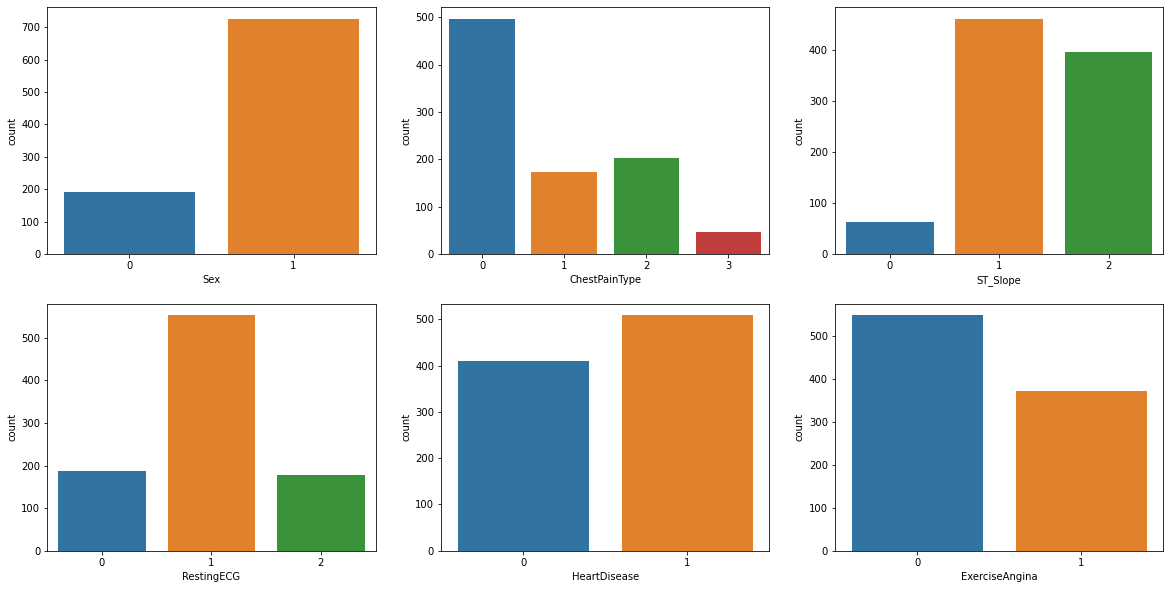

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))

sns.countplot(x=data['Sex'], data=data, ax=axs[0, 0])
sns.countplot(x=data['ChestPainType'], data=data, ax=axs[0, 1])
sns.countplot(x=data['RestingECG'], data=data, ax=axs[1, 0])
sns.countplot(x=data['HeartDisease'], data=data, ax=axs[1, 1])
sns.countplot(x=data['ST_Slope'], data=data, ax=axs[0, 2])
sns.countplot(x=data['ExerciseAngina'], data=data, ax=axs[1, 2])

C:\Users\malik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\malik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

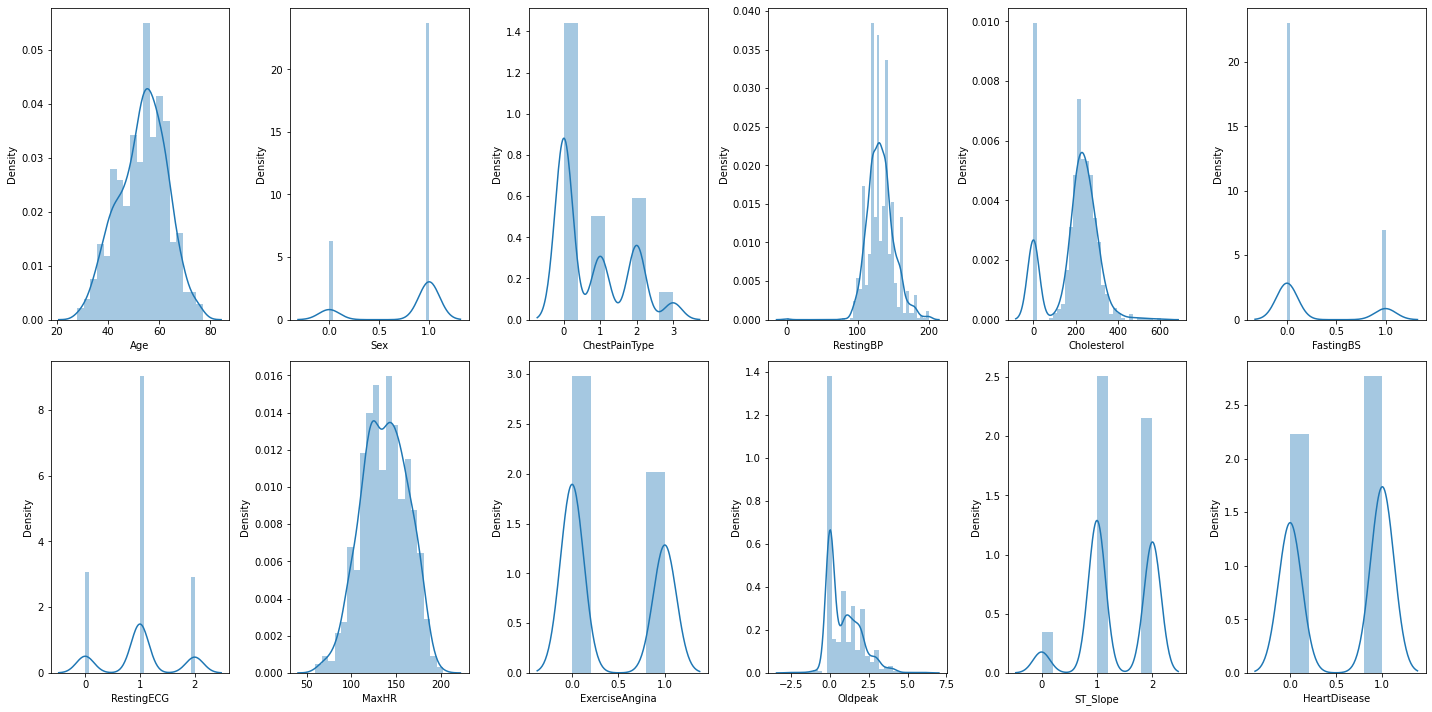

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
axs = axs.flatten()

for k, v in data.items():
  sns.distplot(v, ax=axs[index])
  index += 1

plt.tight_layout()

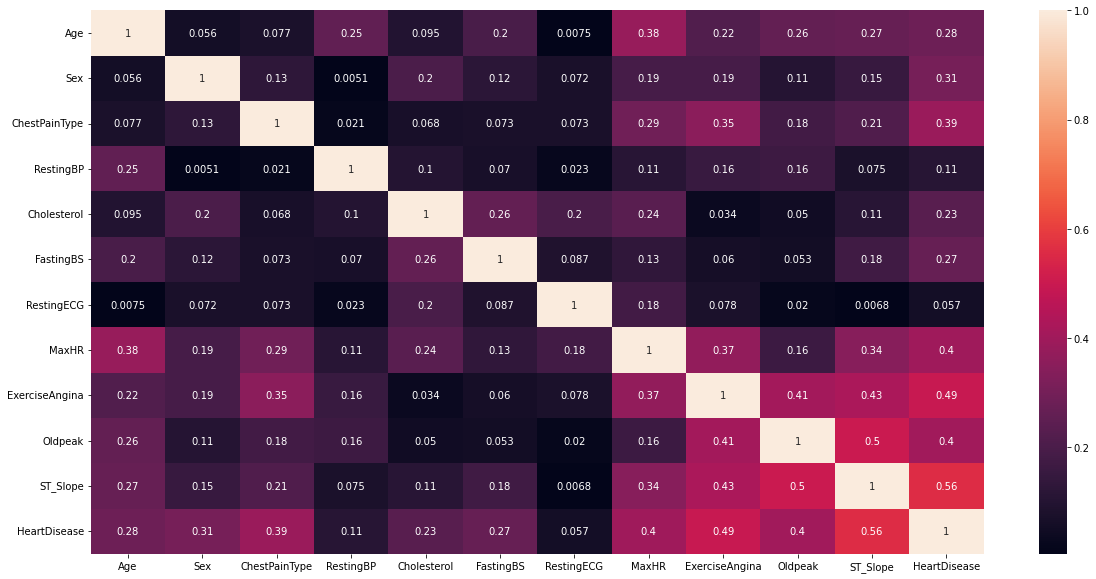

In [ ]:
plt.figure(figsize=(20, 10))

cor = data.corr().abs()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
# Splitting Train and Test Dataset

from sklearn.model_selection import train_test_split

feature_names = [index for index, value in data.iteritems()]
feature_names.remove('HeartDisease')

x = data[feature_names]
y = data['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 11)
(184, 11)
(734,)
(184,)


In [ ]:
# MODEL LINEAR SVM

from sklearn.svm import SVC

model_SVC = SVC(kernel='linear')
model_SVC.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

model_eval = {}

model_SVC_predict = model_SVC.predict(x_test)
metrict_SVC_linear = precision_recall_fscore_support(y_true=y_test, y_pred=model_SVC_predict, average='macro')

print(metrict_SVC_linear)

model_eval['SVC Linear'] = metrict_SVC_linear

(0.8735576923076923, 0.8725278676734988, 0.873015873015873, None)
